In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import cv2
import numpy as np

In [51]:
from utils import *

In [4]:
def match_and_score(real_img, cad_img):
    sift = cv2.SIFT_create()
    kp1, des1 = sift.detectAndCompute(real_img, None)
    kp2, des2 = sift.detectAndCompute(cad_img, None)

    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1, des2, k=2)

    # Lowe's Ratio Test
    ratio = 0.75
    good_matches = [m for m,n in matches if m.distance < ratio*n.distance]

    score = len(good_matches) / (len(kp1) + 1e-6)

    return score, kp1, kp2, good_matches

In [43]:
real_img = cv2.imread('images/real/2.jpeg')
cad_images = [cv2.imread(f"images/cad/{i}.png") for i in range(1, 6)]

## Visualizations

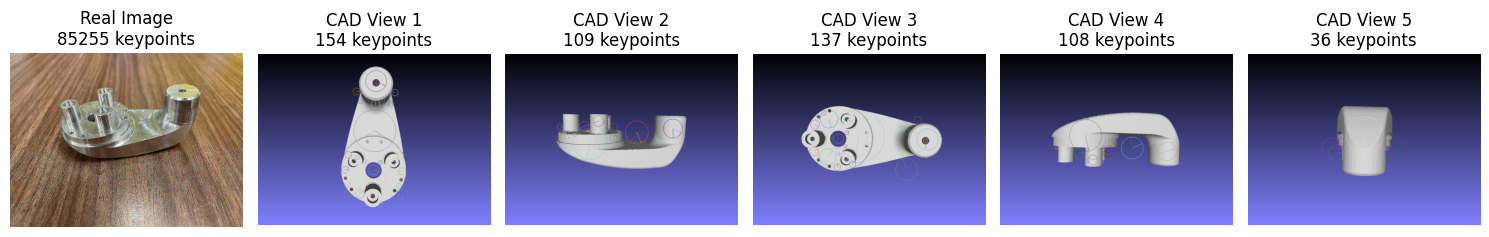

In [52]:
visualize_all_keypoints(real_img, cad_images)

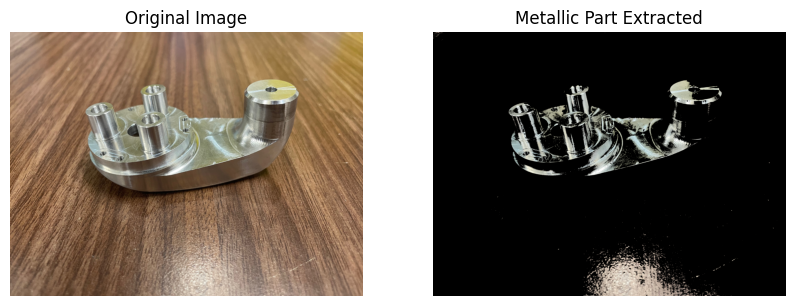

In [45]:
metal_img, metal_mask = extract_metallic_part(real_img)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(real_img, cv2.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(metal_img, cv2.COLOR_BGR2RGB))
plt.title("Metallic Part Extracted")
plt.axis('off')

plt.show()

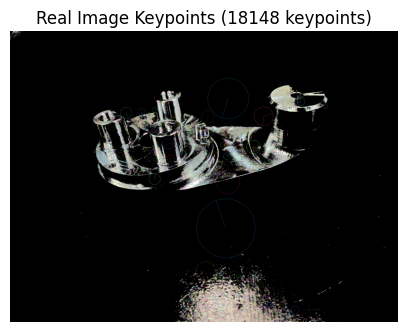

In [46]:
visualize_keypoints(metal_img, "Real Image Keypoints")


# Scoring

In [47]:
scores = []
for cad_img in cad_images:
    score, _, _, _ = match_and_score(metal_img, cad_img)
    scores.append(score)

best_idx = np.argmax(scores)

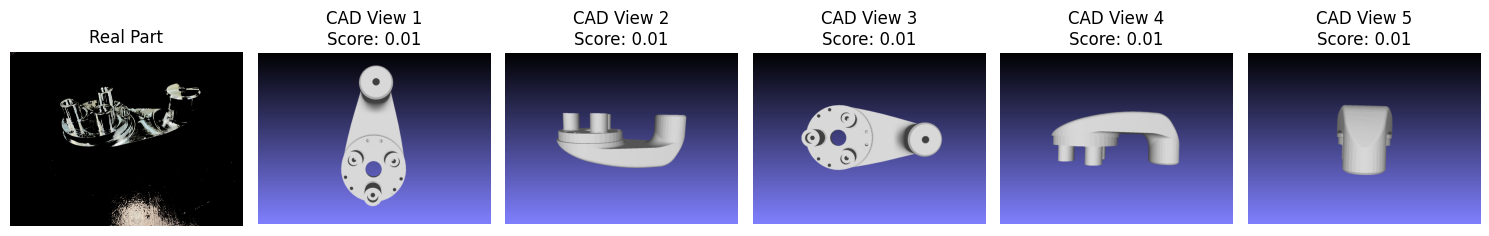

In [49]:
visualize_real_with_cad(metal_img, cad_images, scores, best_idx)